#   Music world

# Motivation

For the people who want to start their music careers. Should you be a club DJ, drummer, guiratist or something else? 
For people who want to be successful and make one of the best music albums of all-time.
How many songs are enough to make one album great?

Online learning methods nowadays are great and affordable. Easy to transform your hobby to a next level.
One of the biggest online courses is Udemy - with tons of materials form IT coding, marketing, design to learning how to play on guitar, self-develpoment, photography and more. 

Can one of you learn how to be good at music instrument for short period of time? Of course but you shoud dedicate yourself with a lot of practice!



## Data for analysis - Part 1

I will analyze a musican datasets with 2 tables. I will explore genres and their critic's marks.
What are the best genres through the years, their status (number of sales, number of tracks).
What kind of genres are after 2016 and have they got good critic mark?
Is number of sales related with high critic marks?

Data source: https://www.kaggle.com/revilrosa/music-label-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


# Inserting and merging data

Importing a csv file with album data and basic exploration

In [2]:
albums_data = pd.read_csv("albums.csv")

In [3]:
albums_data.head()

,id,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006,11,905193,4.0,1.5,3.0
1,2,23548,Down Mare,Metal,2014,7,969122,3.0,4.0,5.0
2,3,17822,Embarrassed Hungry,Latino,2000,11,522095,2.5,1.0,2.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017,4,610116,1.5,2.0,4.0
4,5,24941,Decent Distance Georgian,Black Metal,2010,8,151111,4.5,2.5,1.0


In [4]:
albums_data.shape

(100000, 10)

In [5]:
albums_data.isna().any()

id                      False
artist_id               False
album_title             False
genre                   False
year_of_pub             False
num_of_tracks           False
num_of_sales            False
rolling_stone_critic    False
mtv_critic              False
music_maniac_critic     False
dtype: bool

In [6]:
albums_data.dtypes

id                        int64
artist_id                 int64
album_title              object
genre                    object
year_of_pub               int64
num_of_tracks             int64
num_of_sales              int64
rolling_stone_critic    float64
mtv_critic              float64
music_maniac_critic     float64
dtype: object

Reading csv file and basic exploration on artist data

In [7]:
artist_data = pd.read_csv("artists.csv", header = None)
artist_data.columns = ['artist_id', 'real_name', 'art_name', 'role', 'year_of_birth', 'country',
                                                   'city', 'email', 'zip_code']

In [8]:
artist_data.shape

(50001, 9)

In [9]:
artist_data = artist_data.drop(0, axis = 0)

In [10]:
artist_data

,artist_id,real_name,art_name,role,year_of_birth,country,city,email,zip_code
1,1,Kameko Nelson,NaN,female voice,1981,Slovenia,Vedrin,lorem.tristique.aliquet@nonummyFusce.co.uk,6914
2,2,Sacha Cameron,Bianco Ibureno Chloride,artist,1955,Guernsey,Montigny-le-Tilleul,Sed@elementum.com,0568
3,3,Thane E. Oliver,NaN,rapper,1993,Guinea-Bissau,Saint-Sébastien-sur-Loire,Integer.tincidunt.aliquam@libero.com,813154
4,4,Cole E. Joseph,Persian responsible,bassist,1994,Estonia,Newquay,nulla.magna.malesuada@vulputate.com,A4S 2B3
5,5,Sonia U. Jensen,Asleep lonely Big Morgan,DJ,1988,Vanuatu,Dudzele,faucibus@euismodetcommodo.edu,46418
...,...,...,...,...,...,...,...,...,...
49996,49996,Cain G. Estes,Pakistan,band member,1982,Aruba,Cagli,In@tinciduntduiaugue.co.uk,YW2 0LG
49997,49997,Unity D. Valenzuela,Bislama Brass,drummer,1956,Canada,Caprino Bergamasco,Donec.porttitor.tellus@augueporttitorinterdum.org,6999 YX
49998,49998,Lamar Porter,Typical,rapper,1990,Bangladesh,Massarosa,consectetuer.adipiscing@In.com,34-682
49999,49999,Sylvester O. Mccall,Glossy Kyleigh,chorister,1994,Libya,Tramutola,mi@laoreet.edu,08737


In [11]:
artist_data.artist_id = artist_data.artist_id.astype(int)

In [12]:
artist_data.dtypes

artist_id         int32
real_name        object
art_name         object
role             object
year_of_birth    object
country          object
city             object
email            object
zip_code         object
dtype: object

Merging the datas on column: artist_id

This is merge one to many: One album has one artist, but one artist can have many albums
The artist_data shape is 50 000 and album_data shape is 100 000

In [13]:
df_merged = pd.merge(artist_data, albums_data)
df_merged.columns

Index(['artist_id', 'real_name', 'art_name', 'role', 'year_of_birth',
       'country', 'city', 'email', 'zip_code', 'id', 'album_title', 'genre',
       'year_of_pub', 'num_of_tracks', 'num_of_sales', 'rolling_stone_critic',
       'mtv_critic', 'music_maniac_critic'],
      dtype='object')

The columns i want are: 

In [14]:
df_merged = df_merged[['artist_id', 'real_name', 'role', 'country', 'id', 'album_title', 'genre', 'year_of_pub', 'num_of_tracks',
                    'num_of_sales', 'rolling_stone_critic', 'mtv_critic', 'music_maniac_critic' ]]

In [15]:
df_merged.head()

,artist_id,real_name,role,country,id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,Kameko Nelson,female voice,Slovenia,95634,Connect Bless Sick,Heavy Metal,2008,13,549674,2.5,4.5,3.0
1,2,Sacha Cameron,artist,Guernsey,27122,Pray Hope kill At,Western,2008,9,402024,2.5,2.0,2.5
2,3,Thane E. Oliver,rapper,Guinea-Bissau,59210,Go! Technical The Analyst,Western,2013,14,896767,1.0,1.5,1.5
3,4,Cole E. Joseph,bassist,Estonia,14039,Repeat White Pleasant Matteo,Live,2011,2,819474,5.0,1.0,1.0
4,4,Cole E. Joseph,bassist,Estonia,58546,Miss Johnson,Pop,2006,3,650898,3.5,3.5,3.0


In [16]:
df_merged.shape

(100000, 13)

I will add addition column with mean value of 3 of the critics marks. 

In [17]:
df_merged['mean_score_critic'] = round(((df_merged['rolling_stone_critic'] + df_merged['mtv_critic'] + 
                                   df_merged['music_maniac_critic']) / 3),1)

In [18]:
df_merged.head()

,artist_id,real_name,role,country,id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic,mean_score_critic
0,1,Kameko Nelson,female voice,Slovenia,95634,Connect Bless Sick,Heavy Metal,2008,13,549674,2.5,4.5,3.0,3.3
1,2,Sacha Cameron,artist,Guernsey,27122,Pray Hope kill At,Western,2008,9,402024,2.5,2.0,2.5,2.3
2,3,Thane E. Oliver,rapper,Guinea-Bissau,59210,Go! Technical The Analyst,Western,2013,14,896767,1.0,1.5,1.5,1.3
3,4,Cole E. Joseph,bassist,Estonia,14039,Repeat White Pleasant Matteo,Live,2011,2,819474,5.0,1.0,1.0,2.3
4,4,Cole E. Joseph,bassist,Estonia,58546,Miss Johnson,Pop,2006,3,650898,3.5,3.5,3.0,3.3


## Exploration

### Exploring music genres

We will explore the ganres and their songs and albums

In [19]:
df_merged.genre.unique()

array(['Heavy Metal', 'Western', 'Live', 'Pop', 'Unplugged', 'Folk',
       'Rap', 'Indie', 'Techno', 'Black Metal', 'Latino', 'Holy Metal',
       'Death Metal', 'Punk', 'Rock', 'Metal', 'Indietronica', 'Parody',
       'Hard Rock', 'Compilation', 'Progressive', 'Pop-Rock', 'Retro',
       'Blues', 'Brit-Pop', 'Electro-Pop', 'Alternative', 'Dance',
       'Deep House', 'Boy Band', 'J-Rock', 'Ambient', 'Jazz', 'Lounge',
       'Gospel', 'K-Pop', 'Country', 'Trap'], dtype=object)

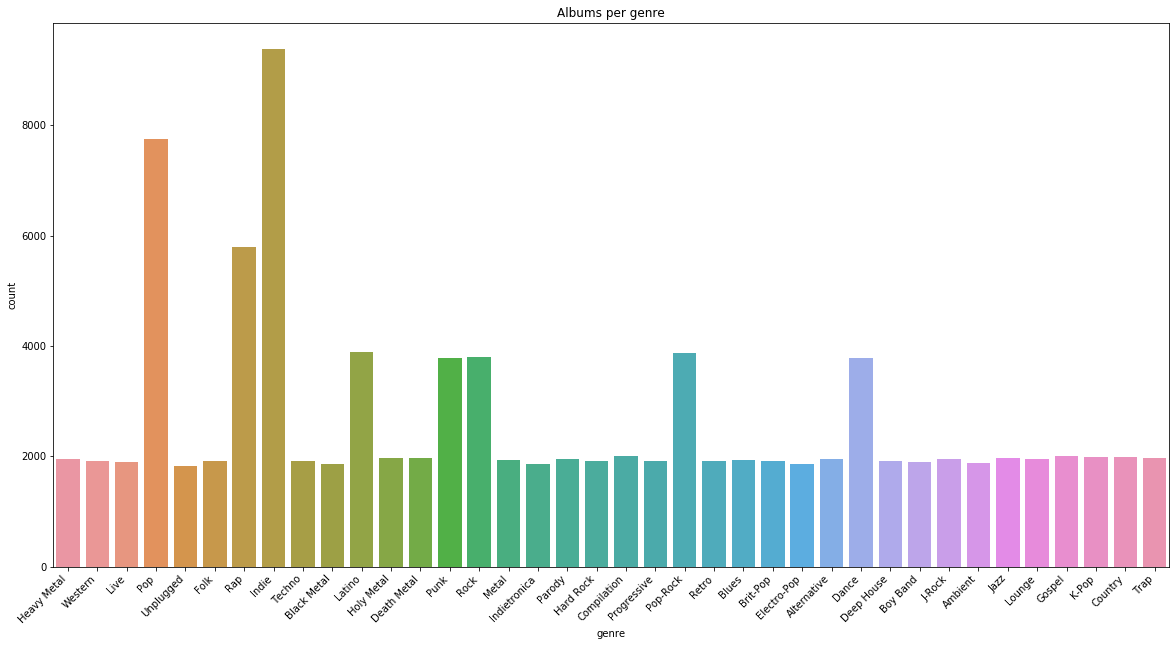

In [20]:
plt.figure(figsize=(20,10))
plot = sns.countplot(x = 'genre', data = df_merged)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title("Albums per genre")
plt.show()

As we see Indie has got the most albums. After Indie we have Pop, Rap, Latino, Ounk, Rock, Dance and Pop-Rock 

Number of tracks in each genre

In [21]:
number_tracks = df_merged.groupby('genre', as_index = False).agg({'num_of_tracks': 'sum'}) 
number_tracks = number_tracks.sort_values('num_of_tracks', ascending = False).head(10)

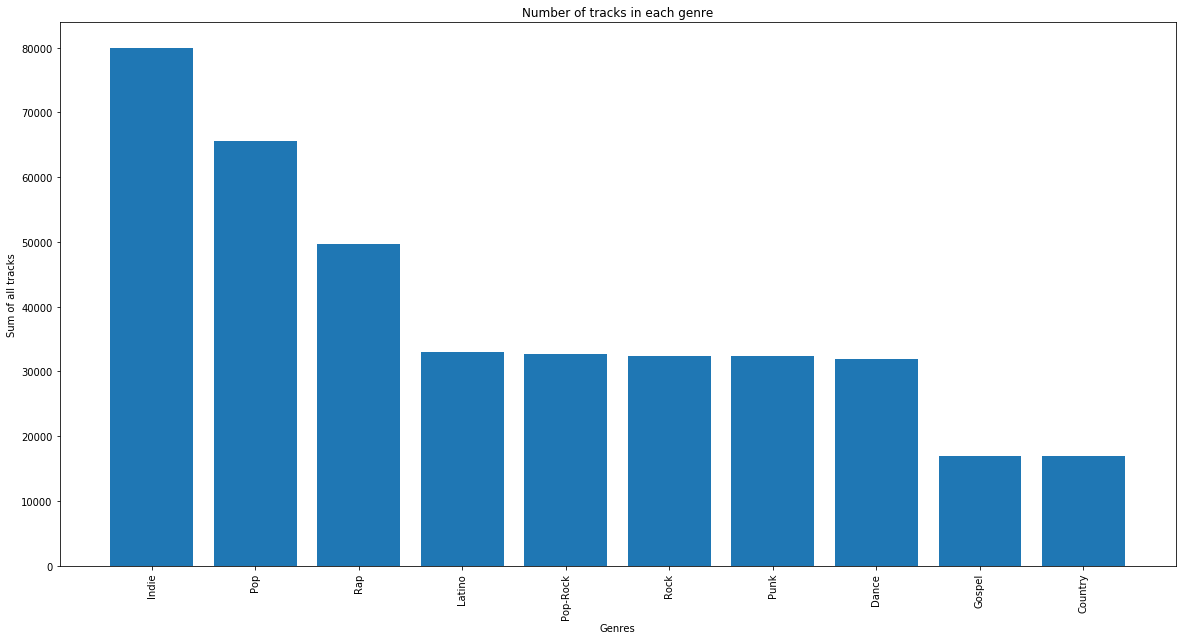

In [22]:
plt.figure(figsize=(20,10))
plot = plt.bar(number_tracks['genre'], height = number_tracks['num_of_tracks'])
plt.xticks(rotation='vertical')
plt.title('Number of tracks in each genre')
plt.xlabel('Genres')
plt.ylabel('Sum of all tracks')
plt.show()

As expected we have again the same arrangement with the genres. Most of the work is situated in those 10 genres.


#### High rated Albums

Here we are going to explore only high rated albums. Were every critic gave score more or equal to 4.

We marks are form 1 to 5 with step 0.5

In [23]:
high_rating_albums = df_merged[(df_merged.rolling_stone_critic >= 4) & (df_merged.mtv_critic >= 4) & (df_merged.music_maniac_critic >= 4)] 

In [24]:
high_rating_albums = high_rating_albums.sort_values('num_of_tracks', ascending = False)

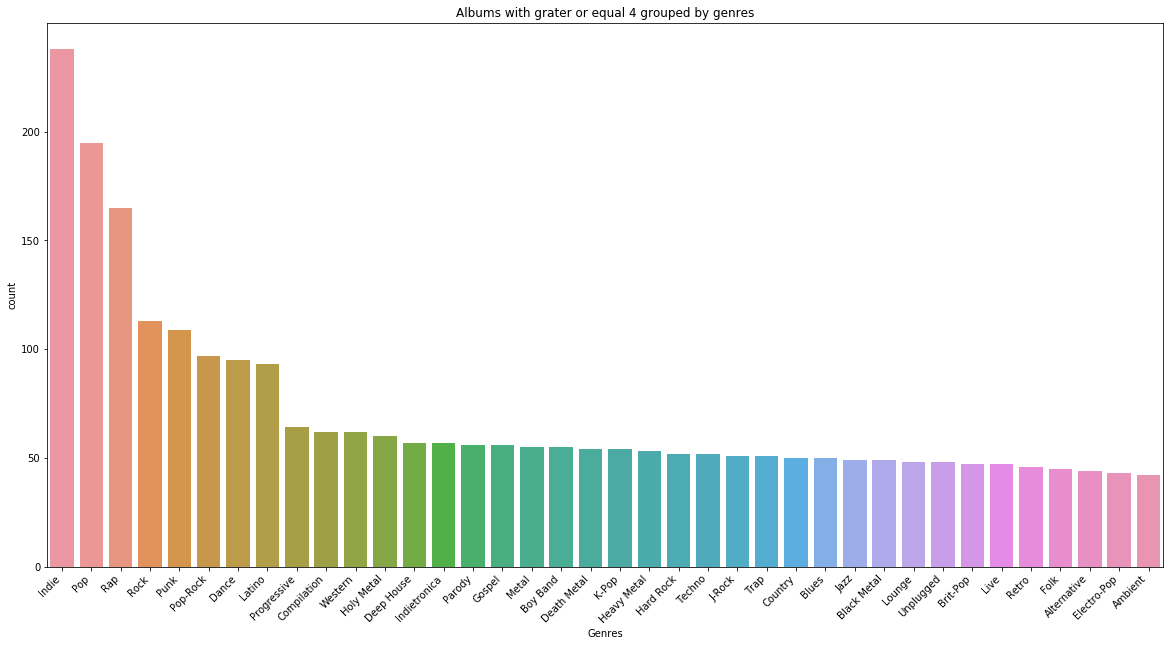

In [25]:
plt.figure(figsize=(20,10))
plot = sns.countplot(x = 'genre', data = high_rating_albums, order=high_rating_albums['genre'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Genres')
plt.title('Albums with grater or equal 4 grouped by genres')
plt.show()

Best high rated albums after 2015 is there any diffence?

In [26]:
after_2015 = high_rating_albums[high_rating_albums.year_of_pub > 2015]

In [27]:
after_2015.head()

,artist_id,real_name,role,country,id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic,mean_score_critic
41002,20466,Curran T. Gardner,chorister,Mozambique,52667,Lexus,Progressive,2017,15,147490,4.5,4.0,5.0,4.5
41266,20610,Hilary I. Estes,band member,Niue,68968,Of Love The Delightful Heroes of Wales,Rap,2016,15,227299,4.0,4.0,4.0,4.0
82791,41420,Hamish Branch,DJ,Qatar,72150,Sudden,K-Pop,2016,15,590125,4.0,4.0,5.0,4.3
7271,3645,Burke V. Moore,DJ,Spain,3557,Bulgaria Human,Pop-Rock,2018,15,868721,5.0,5.0,4.5,4.8
19226,9564,Arden V. Barrera,tenor,Uganda,28545,Trick,J-Rock,2019,15,819531,4.5,4.0,5.0,4.5


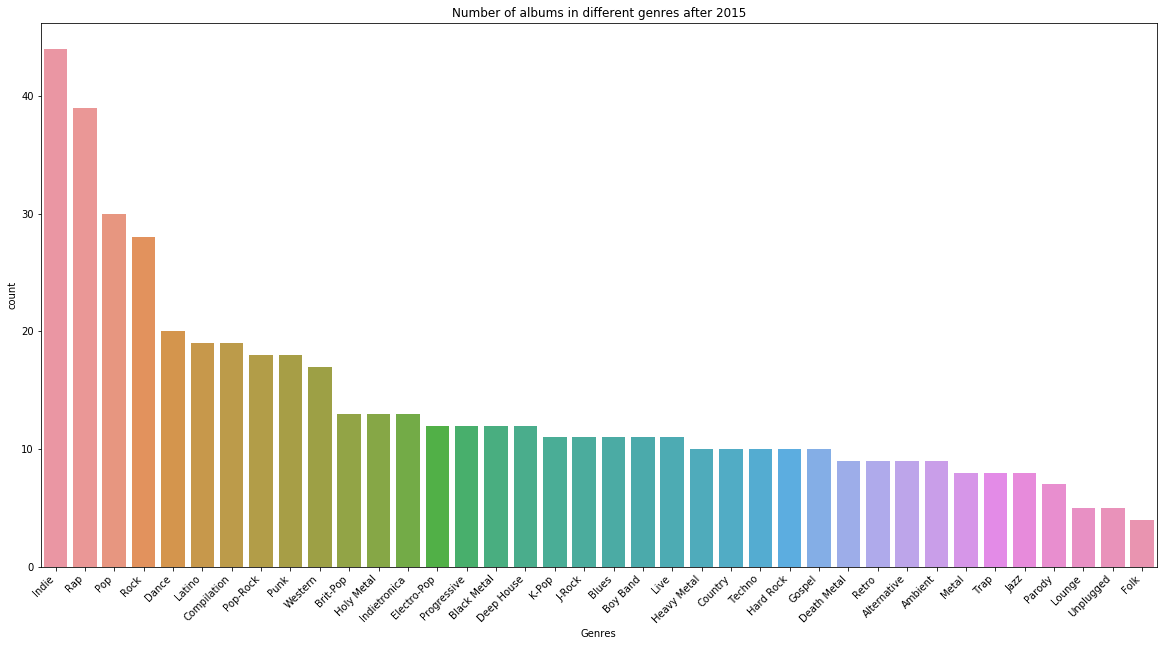

In [28]:
plt.figure(figsize=(20,10))
plot = sns.countplot(x = 'genre', data = after_2015, order=after_2015['genre'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Genres')
plt.title('Number of albums in different genres after 2015')
plt.show()

After that filter we see that from the last 5 years Latino, Dance and Compilaions came in the top of the list. 


#### Musician roles

What are the most common musican roles in the high rated music albums?
What roles a music genre can have?
Do we have all the roles for one music genre?


In [29]:
music_roles = df_merged.groupby('role', as_index = False).count()

In [30]:
music_roles = high_rating_albums.groupby('role', as_index = False).count()

In [31]:
music_roles = music_roles.sort_values(by = 'artist_id', ascending = False)

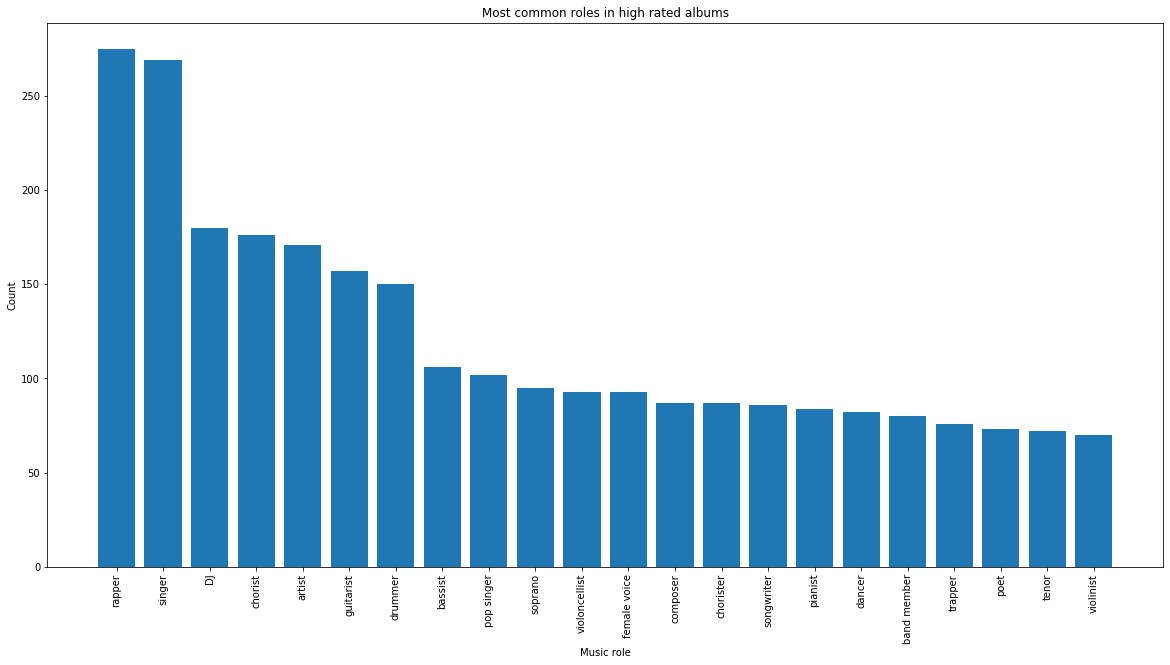

In [32]:
plt.figure(figsize=(20,10))
plt.bar(music_roles.role, music_roles.artist_id)
plt.xticks(rotation='vertical')
plt.title('Most common roles in high rated albums')
plt.xlabel('Music role')
plt.ylabel('Count')
plt.show()

What roles do we have for every kind of the top 8 genres?

In [33]:
for_scatter = high_rating_albums[(high_rating_albums.genre == 'Indie') | (high_rating_albums.genre == 'Rock') |
                                  (high_rating_albums.genre == 'Rap') | (high_rating_albums.genre == 'Dance') |
                                  (high_rating_albums.genre == 'Holy Metal') | (high_rating_albums.genre == 'Pop') |
                                  (high_rating_albums.genre == 'Punk') | (high_rating_albums.genre == 'Latino')]

In [34]:
for_scatter

,artist_id,real_name,role,country,id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic,mean_score_critic
18005,8955,Aidan H. Holden,guitarist,Curaçao,49990,Hare Squirrels,Rap,2014,15,339383,4.0,4.0,4.5,4.2
83982,42012,Jelani Cochran,rapper,Guam,49382,Aboriginal Better have Fall,Pop,2001,15,975979,4.5,4.5,5.0,4.7
76676,38367,Frances Cain,dancer,Japan,97165,Seafood,Latino,2014,15,967027,4.0,4.5,4.0,4.2
41266,20610,Hilary I. Estes,band member,Niue,68968,Of Love The Delightful Heroes of Wales,Rap,2016,15,227299,4.0,4.0,4.0,4.0
41515,20735,Kevin Boyer,rapper,Niger,23620,Pakistan Bus Difficult,Rap,2007,15,574561,4.5,5.0,4.5,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47918,23906,Zenaida Mathews,rapper,Djibouti,59232,Beautiful People Anxious Color Goes Legs,Pop,2007,2,770801,4.5,4.5,4.5,4.5
21119,10509,Sarah D. Newton,pianist,Guinea,68502,Yesterday Black That Doggies Big,Rock,2015,2,199301,4.5,4.5,4.5,4.5
92618,46344,Merrill Joseph,violoncellist,Tajikistan,53557,Alan Skoda Believe,Dance,2011,2,52334,4.0,4.0,4.5,4.2
20896,10391,Porter X. Whitaker,DJ,Jordan,13032,Renault Assistant Klingon Lover,Rock,2012,2,230142,4.0,4.0,4.0,4.0


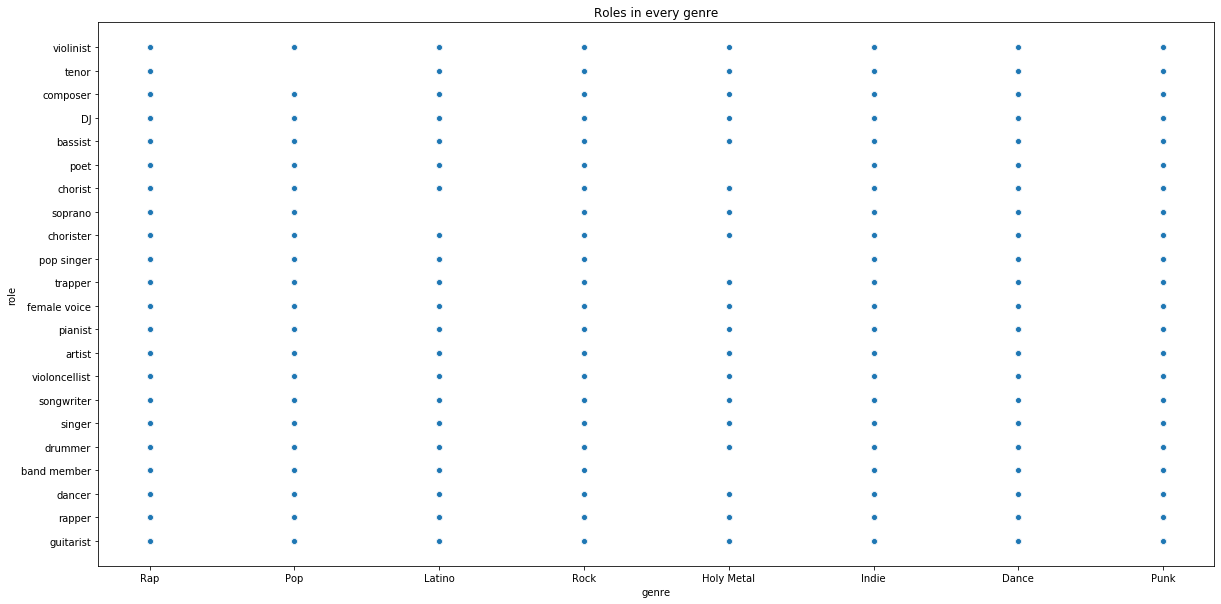

In [35]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'genre', y = 'role', data = for_scatter)

plt.title("Roles in every genre")
plt.show()

Rap, Rock, Indie, Dance and Punk have all the roles. Big diversity!

#### Most sold albums by a musican

In [36]:
number_of_saled_albums_by_genre = df_merged.groupby(['artist_id', 'role', 'genre']).agg({'num_of_sales': 'sum', 'mean_score_critic': 'mean', 'album_title': 'count'})
number_of_saled_albums_by_genre = number_of_saled_albums_by_genre.sort_values(by = 'num_of_sales', ascending=False)

In [37]:
number_of_saled_albums_by_genre.head(20)


,,,num_of_sales,mean_score_critic,album_title
artist_id,role,genre,,,
46452,pop singer,Indie,3181790,2.875000,4
44342,soprano,Pop,2872121,2.400000,3
11247,poet,Pop,2821232,2.566667,3
4249,tenor,Indie,2751210,3.825000,4
21751,bassist,Indie,2622006,2.350000,4
29781,pianist,Indie,2421252,2.566667,3
20348,pop singer,Pop,2391922,1.466667,3
10010,bassist,Pop,2323735,2.233333,3
10464,violoncellist,Indie,2318614,2.600000,3


Those are by genre best sales. The most sales are for Indie genre

And here, we are just going to see by music role:

In [38]:
number_of_saled_albums = df_merged.groupby(['artist_id', 'role']).agg({'num_of_sales': 'sum', 'mean_score_critic': 'mean', 'album_title': 'count'})
number_of_saled_albums = number_of_saled_albums.sort_values(by = 'num_of_sales', ascending=False)

In [39]:
number_of_saled_albums.head(20)

,,num_of_sales,mean_score_critic,album_title
artist_id,role,,,
11290,tenor,6267844,2.777778,9
33896,drummer,6072907,2.333333,9
44614,pianist,5643206,2.444444,9
7889,bassist,5573891,3.725000,8
49450,female voice,5401584,2.750000,8
5508,bassist,5329169,2.700000,6
27648,soprano,5267296,2.657143,7
40017,composer,5214678,2.977778,9
22799,guitarist,5196851,2.587500,8


That proves meadian value of the critic marks are not so important for a musican to sell their work.
People dont have more than 4 and they are selling more than 4 000 000 copies!
And we see very different roles as well. They have similar number of albums.


#### By the end of the analys of Part 1 - i will recommend taking a singing lessons and also in the free time do some bass guitar practice. As we see (from the last 2 tables) all kind of singers(tenor, soprano, chorist and etc.) are in great success also the bass player with the DJ who is also a great idea for Night club compilations and Dance music.
#### For genre, i will recommend aming for one of the mainstream genres (genres with a lot of work in them) and genres after 2016 year: Indie, Rap, Pop, Rock, Dance, Compilation and Latino.


## Data for analysis - Part 2

For this second part i will use Udemy music dataset. This material provides all information about Udemy music courses.
All the materials, videos in one course, price, number of subscribers and more. 

Are there any good courses for singers, bass guitarists and DJ tutorials? How much do they cost? Do you have course for all the levels? 

Dataset source: https://data.world/chasewillden/musical-instrument-courses-from-udemy/workspace/file?filename=MusicInstraments.csv

In [40]:
import re
import nltk 
import nltk as nlp


from nltk.corpus import stopwords
from collections import Counter

In [41]:
stop = set(stopwords.words("english"))

In [42]:
from nltk.corpus import wordnet as wn

In [43]:
udemy_data = pd.read_csv('MusicInstraments.csv')

### Checking data

In [44]:
udemy_data.dtypes

id                        int64
title                    object
url                      object
isPaid                   object
price                    object
numSubscribers            int64
numReviews                int64
numPublishedLectures      int64
instructionalLevel       object
contentInfo              object
publishedTime            object
Column1                  object
Unnamed: 12             float64
Is Paid                  object
Total                   float64
Percent                  object
dtype: object

Transforming data

In [45]:
udemy_data.price = pd.to_numeric(udemy_data.price, errors='coerce')

In [46]:
udemy_data.price = udemy_data.price.fillna(0)

In [47]:
udemy_data.price = udemy_data.price.astype(int)

In [48]:
udemy_data = udemy_data[['id', 'title', 'url', 'isPaid', 'price', 'numSubscribers', 'numReviews', 
                        'numPublishedLectures', 'instructionalLevel', 'contentInfo', 'publishedTime']]

In [49]:
udemy_data.isna().sum()

id                      0
title                   0
url                     0
isPaid                  0
price                   0
numSubscribers          0
numReviews              0
numPublishedLectures    0
instructionalLevel      0
contentInfo             0
publishedTime           0
dtype: int64

We make all the column to lower case string so it can be easy for searching

In [50]:
udemy_data.title = udemy_data.title.str.lower()

In [51]:
udemy_data.shape

(681, 11)

In [52]:
udemy_data.head()

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime
0,696630,"7 ways a beginner guitarist can sound better, ...",https://www.udemy.com/nationalguitaracademy/,FALSE,0,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z
1,643970,instant harmonica - christmas. play jingle bel...,https://www.udemy.com/instant-harmonica-christ...,TRUE,20,823,11,10,All Levels,42 mins,2015-12-11T18:42:43Z
2,801486,playing piano: popular pieces vol. ii,https://www.udemy.com/playing-piano-popular-pi...,TRUE,150,1472,4,24,Beginner Level,1.5 hours,2016-03-31T17:24:49Z
3,455054,ninja chord changes - master your guitar chord...,https://www.udemy.com/ninja-chord-changes/,TRUE,30,1327,11,13,Beginner Level,1.5 hours,2015-03-29T21:57:12Z
4,1257976,your first 10 guitar lessons - learn how to pl...,https://www.udemy.com/your-first-10-guitar-les...,FALSE,0,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z


### Data exploration

Word Cloud

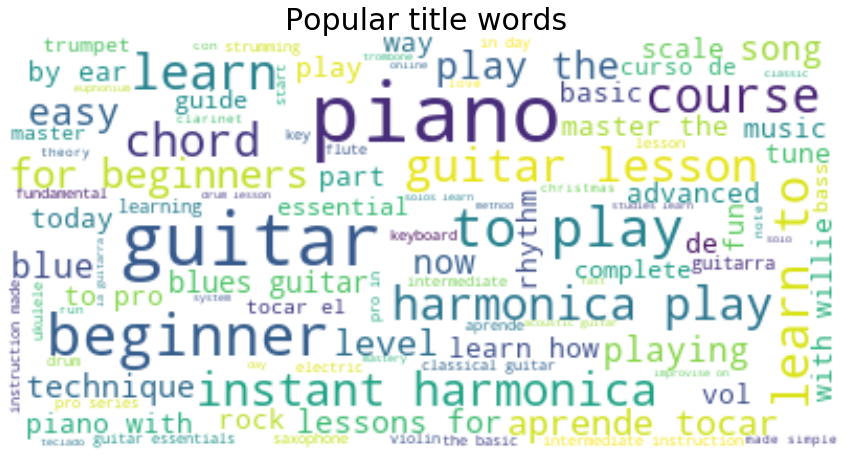

In [53]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
generic_words = " ".join(title for title in udemy_data.title)

plt.figure(figsize  = (15,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=40, max_words=100, background_color="white").generate(generic_words)
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title('Popular title words', fontsize=30)
plt.axis('off')
plt.show()

We can see that this is a music lesson data and they provide guitar, piano, hormonica, trumpet and etc. for beginners, advanced.

### Text exploration

We will see what are the most common words in the descriptions of the Udemy lectures.

In [54]:
Song_Name = [ word for word in udemy_data.title if not word in set(stopwords.words("english"))]
Song_Name

['7 ways a beginner guitarist can sound better, instantly!',
 'instant harmonica - christmas. play jingle bells part 1 now',
 'playing piano:  popular pieces vol. ii',
 'ninja chord changes - master your guitar chord changes',
 'your first 10 guitar lessons - learn how to play guitar',
 'pentatonic scale crash course for bass guitar',
 'modal theory for guitar (guitar lessons from lutz academy)',
 'learn fun dreamy piano techniques #1 -  play white christmas',
 'learn jazz piano today',
 'learn to play the drums without a drum kit',
 'learn travis picking from scratch',
 'instant harmonica - how to get single notes in 5 easy steps',
 'piano runs & fills #3:  jazzy chromatic chord song endings',
 'teaching music : start teaching an instrument successfully.',
 'strumming from scratch - rhythm guitar lesson for beginners',
 'blues guitar lessons - from texas to carolina',
 'instant harmonica - play the groovy beatles yesterday today!',
 'beginner guitar quick-start course',
 "mike g's beg

In [55]:
str1 = ''.join(Song_Name)

In [56]:
song_words = re.split('\W+',str1)   ## vsishko koeto e duma da se razdeli maha ,-+/#''
song_words = [word.lower() for word in song_words]

In [57]:
song_meaningfull_words = [word for word in song_words if word not in stop]

In [58]:
counter_meaninfull_words = Counter(song_meaningfull_words)

In [59]:
counter_meaninfull_words.most_common(40)

[('guitar', 165),
 ('piano', 146),
 ('play', 137),
 ('learn', 76),
 ('harmonica', 59),
 ('lessons', 59),
 ('beginner', 54),
 ('blues', 42),
 ('de', 35),
 ('tocar', 33),
 ('vol', 28),
 ('master', 28),
 ('easy', 27),
 ('course', 26),
 ('fun', 24),
 ('beginners', 24),
 ('pro', 24),
 ('music', 22),
 ('level', 22),
 ('playing', 22),
 ('el', 21),
 ('2', 19),
 ('rock', 18),
 ('intermediate', 18),
 ('part', 16),
 ('1', 16),
 ('chords', 16),
 ('willie', 16),
 ('la', 16),
 ('chord', 15),
 ('drum', 15),
 ('5', 15),
 ('songs', 15),
 ('instant', 14),
 ('jazz', 14),
 ('made', 14),
 ('love', 13),
 ('en', 13),
 ('instruction', 13),
 ('today', 12)]

We can see that they provide a lot of courses with guitar and piano lessons. We see blues style but it is essential for music and to be good at any style, people shuld learn basics of blues techniques.

In [60]:
udemy_data.head()

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime
0,696630,"7 ways a beginner guitarist can sound better, ...",https://www.udemy.com/nationalguitaracademy/,FALSE,0,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z
1,643970,instant harmonica - christmas. play jingle bel...,https://www.udemy.com/instant-harmonica-christ...,TRUE,20,823,11,10,All Levels,42 mins,2015-12-11T18:42:43Z
2,801486,playing piano: popular pieces vol. ii,https://www.udemy.com/playing-piano-popular-pi...,TRUE,150,1472,4,24,Beginner Level,1.5 hours,2016-03-31T17:24:49Z
3,455054,ninja chord changes - master your guitar chord...,https://www.udemy.com/ninja-chord-changes/,TRUE,30,1327,11,13,Beginner Level,1.5 hours,2015-03-29T21:57:12Z
4,1257976,your first 10 guitar lessons - learn how to pl...,https://www.udemy.com/your-first-10-guitar-les...,FALSE,0,924,4,18,Beginner Level,1 hour,2017-06-29T00:29:36Z


### Courses for DJ
To be a dj you need to learn how to operate with the dj mixer. As we saw, dance and compilation music after 2016 are one of the best rated music genres.
Also Latino and Pop culture likes Dj role in the music

We can see numbers of subscribers so that can tell us that people like those lectures.

In [61]:
udemy_data[udemy_data.title.str.contains("dj")]

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime
20,271652,how to play the djembe: for beginners,https://www.udemy.com/how-to-play-the-djembe-f...,TRUE,30,414,18,19,All Levels,1 hour,2014-11-11T05:00:30Z
86,467408,"how to play djembe, drums & rhythm. level 2",https://www.udemy.com/how-to-play-djembe-drums...,TRUE,40,390,14,36,Intermediate Level,2 hours,2015-07-23T18:48:24Z
258,663710,how to build a professional djembe: create mus...,https://www.udemy.com/build-a-djembe/,TRUE,40,122,2,29,All Levels,1.5 hours,2015-11-12T17:59:28Z
623,566856,learn monster godj,https://www.udemy.com/learn-monster-godj/,FALSE,0,991,29,12,Beginner Level,1 hour,2015-07-29T17:49:53Z


I recommend exploring: https://www.udemy.com/learn-monster-godj/ 
This course is Free and it's for beginners. If you want to improve jump on:

In [62]:
udemy_data.loc[(udemy_data.id == 271652) | (udemy_data.id == 467408), ['url', 'price', 'contentInfo']]

,url,price,contentInfo
20,https://www.udemy.com/how-to-play-the-djembe-f...,30,1 hour
86,https://www.udemy.com/how-to-play-djembe-drums...,40,2 hours


### Courses for bass player

In [63]:
bass_lessons = udemy_data[(udemy_data.title.str.contains('bass')) & (~udemy_data.title.str.contains('oon'))]

In [64]:
bass_lessons = bass_lessons.sort_values(by = 'numSubscribers', ascending=False)

In [65]:
bass_lessons

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime
55,396238,"learn bass guitar- have fun, amaze your friend...",https://www.udemy.com/bassguitar/,TRUE,100,1605,19,52,Beginner Level,2 hours,2015-02-13T03:27:03Z
247,917432,the professional bass masterclass,https://www.udemy.com/the-professional-bass-ma...,TRUE,200,1449,136,88,All Levels,7 hours,2016-10-24T18:22:57Z
5,1253224,pentatonic scale crash course for bass guitar,https://www.udemy.com/pentatonic-scale-crash-c...,FALSE,0,898,6,24,Intermediate Level,1 hour,2017-06-15T18:35:07Z
68,808292,take your double bass drum technique to the ne...,https://www.udemy.com/take-your-double-bass-dr...,TRUE,40,584,7,196,Intermediate Level,5.5 hours,2016-05-16T00:27:34Z
437,277770,electric bass right from the start,https://www.udemy.com/electric-bass-right-from...,TRUE,100,239,1,9,Beginner Level,40 mins,2016-03-14T16:42:12Z
155,665278,walking bass - quick start guide,https://www.udemy.com/walking-bass-quick-start...,TRUE,50,193,20,31,All Levels,1 hour,2015-12-10T22:33:58Z
23,820086,bass guitar lessons for beginners,https://www.udemy.com/the-music-coach-online-b...,TRUE,95,180,21,38,Beginner Level,2.5 hours,2016-04-26T17:30:35Z
378,455676,electric bass for busy beginners course 1,https://www.udemy.com/bassforbusybeginners/,TRUE,50,114,15,13,All Levels,1.5 hours,2015-04-27T20:20:47Z
490,846962,slap bass for beginners,https://www.udemy.com/slap-bass-for-beginners/,TRUE,50,79,3,25,All Levels,1.5 hours,2016-06-23T16:37:38Z
157,1002272,blues bass - quick start guide,https://www.udemy.com/blues-bass-quick-start-g...,TRUE,50,59,8,29,All Levels,1.5 hours,2016-11-24T22:40:05Z


This table is sorted by number of subscribers since that number can tell us about the quality of the content!

It's people's job to decide how much to pay but people should watch for the content info and the price. So i can recommend starting a biginners course or all level course.

The most subscribers we have on 100$ Beginner level course but we have only 2 hours or content, i would recommend:

In [66]:
bass_recommended = bass_lessons[(bass_lessons.id == 917432) | (bass_lessons.id == 820086)]

In [67]:
bass_recommended

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime
247,917432,the professional bass masterclass,https://www.udemy.com/the-professional-bass-ma...,TRUE,200,1449,136,88,All Levels,7 hours,2016-10-24T18:22:57Z
23,820086,bass guitar lessons for beginners,https://www.udemy.com/the-music-coach-online-b...,TRUE,95,180,21,38,Beginner Level,2.5 hours,2016-04-26T17:30:35Z


In [68]:
print(f'Here you pay for all those courses {bass_recommended.price.sum()}$ and for content with {bass_recommended.numPublishedLectures.sum()} videos')

Here you pay for all those courses 295$ and for content with 126 videos


### Courses for singers

In [69]:
udemy_data[udemy_data.title.str.contains('sing')]

,id,title,url,isPaid,price,numSubscribers,numReviews,numPublishedLectures,instructionalLevel,contentInfo,publishedTime
11,560662,instant harmonica - how to get single notes in...,https://www.udemy.com/instant-harmonica-how-to...,TRUE,20,835,10,7,Beginner Level,38 mins,2015-07-22T22:15:10Z
43,104304,"learn to play the piano using pop, r&b and gos...",https://www.udemy.com/learn-to-play-the-piano-...,TRUE,50,1504,15,14,All Levels,41 mins,2013-10-15T18:13:46Z
44,413182,play by ear #4: play song by ear with 3 chords...,https://www.udemy.com/play-by-ear-4-play-many-...,TRUE,95,1064,11,110,All Levels,2.5 hours,2015-02-07T18:40:39Z
202,938260,piano for singer/songwriters 2: pop/rock rhyth...,https://www.udemy.com/piano-singersongwriter-r...,TRUE,100,567,37,24,All Levels,1.5 hours,2016-08-29T19:12:11Z
243,658276,piano for singer/songwriters | write songs and...,https://www.udemy.com/pianoforsingersongwriters/,TRUE,100,3371,175,42,Beginner Level,3 hours,2015-11-12T01:10:55Z
276,1008098,learn to play guitar and sing at the same time,https://www.udemy.com/play-and-sing/,TRUE,45,66,9,8,Beginner Level,1 hour,2016-11-25T22:42:01Z
313,228268,play music on harmonica using 8 notes - learn ...,https://www.udemy.com/benhewlettharmonicatuiti...,TRUE,35,29,0,14,Beginner Level,1 hour,2014-05-26T13:25:00Z
370,888668,how to sing and play the guitar (at the same t...,https://www.udemy.com/how-to-sing-and-play-the...,TRUE,20,78,8,24,Beginner Level,1.5 hours,2016-07-18T19:42:57Z
436,149602,learn to play trumpet fast using the passive t...,https://www.udemy.com/passive-trumpet-lessons/,TRUE,50,92,3,71,All Levels,1.5 hours,2014-01-27T17:06:43Z
555,139794,killer harmonica sounds using the tongue and b...,https://www.udemy.com/benhewlettharmonicatuiti...,TRUE,35,80,2,16,Intermediate Level,2 hours,2014-03-17T15:18:34Z


As we see we don't have option courses for singers. All of them require to play on music instrument but if you play or going to learn how to play on a piano, since this instument is on a basic level for all musicants to know. 

I will recommend joining this courses:

In [70]:
udemy_data.loc[(udemy_data.id == 658276) | (udemy_data.id == 938260), ['url', 'price', 'contentInfo', 'numSubscribers']]

,url,price,contentInfo,numSubscribers
202,https://www.udemy.com/piano-singersongwriter-r...,100,1.5 hours,567
243,https://www.udemy.com/pianoforsingersongwriters/,100,3 hours,3371


You should probably search for singing courses in your city and shcools.

### As a conclusion i would suggest not aiming for the best critic mark but making a lot of people listening to your albums. This is the essensial-for making a profit out of it. Make your hobby job and begin learning. Dive into the world of MUSIC! 